In [ ]:
# http://nbviewer.jupyter.org/github/ricklupton/beamfe/blob/master/theory/FE%20element%20matrices.ipynb
import numpy as np
import sympy
from sympy import symbols, Matrix
sympy.init_printing()
%matplotlib inline

In [54]:
x, L, rho, E, I= symbols('x, L, rho, E, I')

# Shape functions
S = Matrix(np.zeros((2, 6)))
N1 = (L-x)/L
N2 = L - (3 * (x ** 2) / (L ** 2)) + (2 * (x ** 3) / (L ** 3))
N3 = x - (2 * (x ** 2) / L) + (x ** 3) / (L ** 2)
N4 = x / L
N5 = (3 * (x ** 2) / (L ** 2)) - (2 * (x ** 3) / (L ** 3))
N6 = - (x ** 2) / L + (x ** 3) / (L ** 2)

S[0,0] = N1
S[1,1] = N2
S[1,2] = N3
S[0,3] = N4
S[1,4] = N5
S[1,5] = N6

S

⎡L - x                                   x                         ⎤
⎢─────        0.0             0.0        ─       0.0         0.0   ⎥
⎢  L                                     L                         ⎥
⎢                                                                  ⎥
⎢              2      3         2    3          2      3     2    3⎥
⎢           3⋅x    2⋅x       2⋅x    x        3⋅x    2⋅x     x    x ⎥
⎢ 0.0   L - ──── + ────  x - ──── + ──  0.0  ──── - ────  - ── + ──⎥
⎢             2      3        L      2         2      3     L     2⎥
⎣            L      L               L         L      L           L ⎦

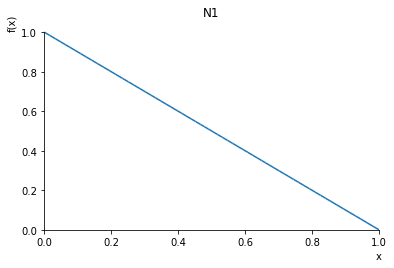

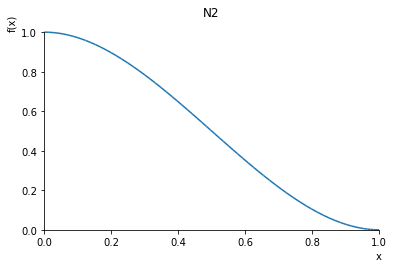

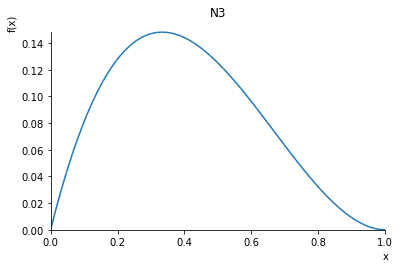

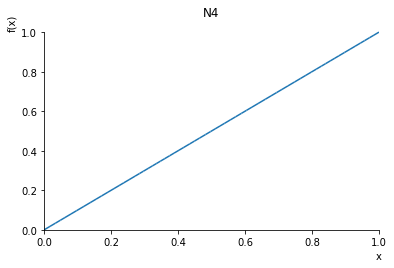

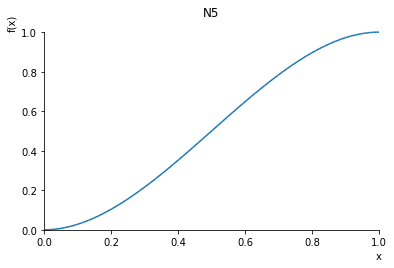

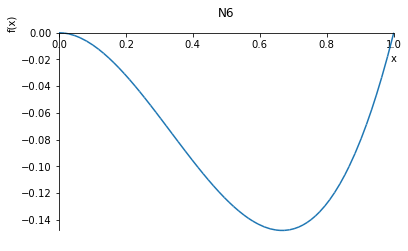

In [55]:
titles = ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']
for i in range(6):
    sympy.plot(*[xx.subs(L, 1) for xx in S[:,i] if xx != 0], (x, 0, 1), title=titles[i])

In [56]:
B = Matrix(np.zeros((2, 6)))
B = S.diff(x, 2)
B

⎡0       0             0        0       0            0      ⎤
⎢                                                           ⎥
⎢     ⎛     2⋅x⎞    ⎛     3⋅x⎞       ⎛    2⋅x⎞    ⎛     3⋅x⎞⎥
⎢   6⋅⎜-1 + ───⎟  2⋅⎜-2 + ───⎟     6⋅⎜1 - ───⎟  2⋅⎜-1 + ───⎟⎥
⎢     ⎝      L ⎠    ⎝      L ⎠       ⎝     L ⎠    ⎝      L ⎠⎥
⎢0  ────────────  ────────────  0  ───────────  ────────────⎥
⎢         2            L                 2           L      ⎥
⎣        L                              L                   ⎦

In [62]:
integrand=((E * I) / L) * B.T * B
K=integrand.applyfunc(lambda xxx: L * sympy.integrate(xxx, (x, 0, L)).expand().factor())
K.simplify()
K

⎡0     0         0     0     0         0   ⎤
⎢                                          ⎥
⎢    12⋅E⋅I    6⋅E⋅I      -12⋅E⋅I    6⋅E⋅I ⎥
⎢0   ──────    ─────   0  ────────   ───── ⎥
⎢       3         2           3         2  ⎥
⎢      L         L           L         L   ⎥
⎢                                          ⎥
⎢    6⋅E⋅I     4⋅E⋅I      -6⋅E⋅I     2⋅E⋅I ⎥
⎢0   ─────     ─────   0  ───────    ───── ⎥
⎢       2        L            2        L   ⎥
⎢      L                     L             ⎥
⎢                                          ⎥
⎢0     0         0     0     0         0   ⎥
⎢                                          ⎥
⎢   -12⋅E⋅I   -6⋅E⋅I       12⋅E⋅I   -6⋅E⋅I ⎥
⎢0  ────────  ───────  0   ──────   ───────⎥
⎢       3         2           3         2  ⎥
⎢      L         L           L         L   ⎥
⎢                                          ⎥
⎢    6⋅E⋅I     2⋅E⋅I      -6⋅E⋅I     4⋅E⋅I ⎥
⎢0   ─────     ─────   0  ───────    ───── ⎥
⎢       2        L            2        L   ⎥
⎣      L  

In [63]:
_Kg = Matrix(np.zeros((2, 6)))
B = S.diff(x, 1)
B
integrand=B.T * B
Kg=integrand.applyfunc(lambda xxx: L * sympy.integrate(xxx, (x, 0, L)).expand().factor())
Kg.simplify()
Kg

⎡1    0     0    -1   0     0  ⎤
⎢                              ⎥
⎢           L               L  ⎥
⎢0   6/5    ──   0   -6/5   ── ⎥
⎢           10              10 ⎥
⎢                              ⎥
⎢             2              2 ⎥
⎢     L    2⋅L       -L    -L  ⎥
⎢0    ──   ────  0   ───   ────⎥
⎢     10    15        10    30 ⎥
⎢                              ⎥
⎢-1   0     0    1    0     0  ⎥
⎢                              ⎥
⎢          -L              -L  ⎥
⎢0   -6/5  ───   0   6/5   ─── ⎥
⎢           10              10 ⎥
⎢                              ⎥
⎢            2                2⎥
⎢     L    -L        -L    2⋅L ⎥
⎢0    ──   ────  0   ───   ────⎥
⎣     10    30        10    15 ⎦

In [58]:
def sym_me():
    m = Matrix(np.diag([rho, rho, rho, 0]))
    integrand = S.T * m * S
    me = integrand.applyfunc(
        lambda xxx: l * sympy.integrate(xxx, (x, 0, 1)).expand().factor()
    )
    return me
me = sym_me()
me.shape

ShapeError: Matrices size mismatch.